# ASSIGNMENT 3

## Task 1:- Handle Missing Values and Remove Outliers
##### 1)  Load the "Apple Adjusted Close Price" dataset into your preferred programming environment.



In [1]:
import yfinance as yf
dataset = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


##### 2) Check for any missing values in the dataset and handle them appropriately (e.g., interpolation, filling with mean/median).

In [2]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### If there are missing values, we can handle them using various techniques such as interpolation, forward/backward filling, or filling with mean/median. 

In [3]:
dataset = dataset.fillna(dataset.mean())

##### 3) Detect and remove outliers in the dataset using the z-score method or any other suitable outlier detection technique.



In [4]:
from scipy.stats import zscore
import numpy as np

z_scores = zscore(dataset['Adj Close'])
threshold = 3

outliers = np.abs(z_scores) > threshold
cleaned_dataset = dataset[~outliers]

# In this example, we set a threshold of 3, meaning any data point with a z-score greater than 3
# or less than -3 is considered an outlier. We then create a new dataset cleaned_dataset that excludes these outliers.

## Task 2: Decompose the Time Series
##### 1) Plot the time series data to visualize the overall trend and seasonality patterns.

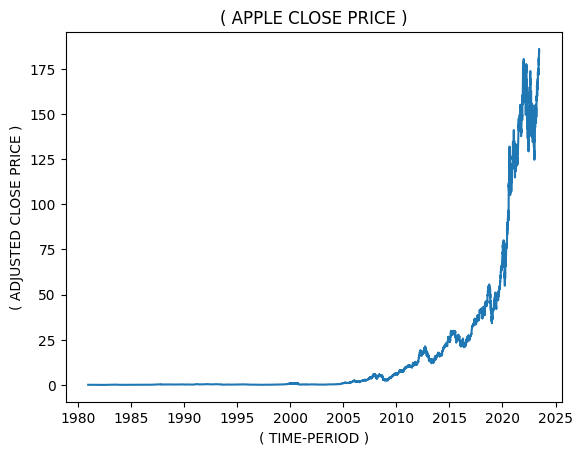

In [5]:
import matplotlib.pyplot as plt

plt.plot(dataset.index, dataset['Adj Close'])
plt.title('( APPLE CLOSE PRICE )')
plt.xlabel('( TIME-PERIOD )')
plt.ylabel('( ADJUSTED CLOSE PRICE )')
plt.show()


##### 2) Apply the seasonal decomposition of time series (e.g., using the seasonal_decompose function in Python's statsmodels library) to decompose the time series into its components: trend, seasonality, and residual.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Converting 'Adj Close' column to numeric.
dataset['Adj Close'] = pd.to_numeric(dataset['Adj Close'])

# Converting index to datetime.
dataset['TIME-PERIOD'] = pd.to_datetime(dataset.index)
dataset.set_index('TIME-PERIOD', inplace=True)

# Trend component
window = 30  # window size 
trend = dataset['Adj Close'].rolling(window=window).mean()

# Seasonality component 
seasonality = dataset['Adj Close'].diff(periods=window)

# Residual component
residual = dataset['Adj Close'] - trend - seasonality

##### 3) Plot the decomposed components and interpret the results.


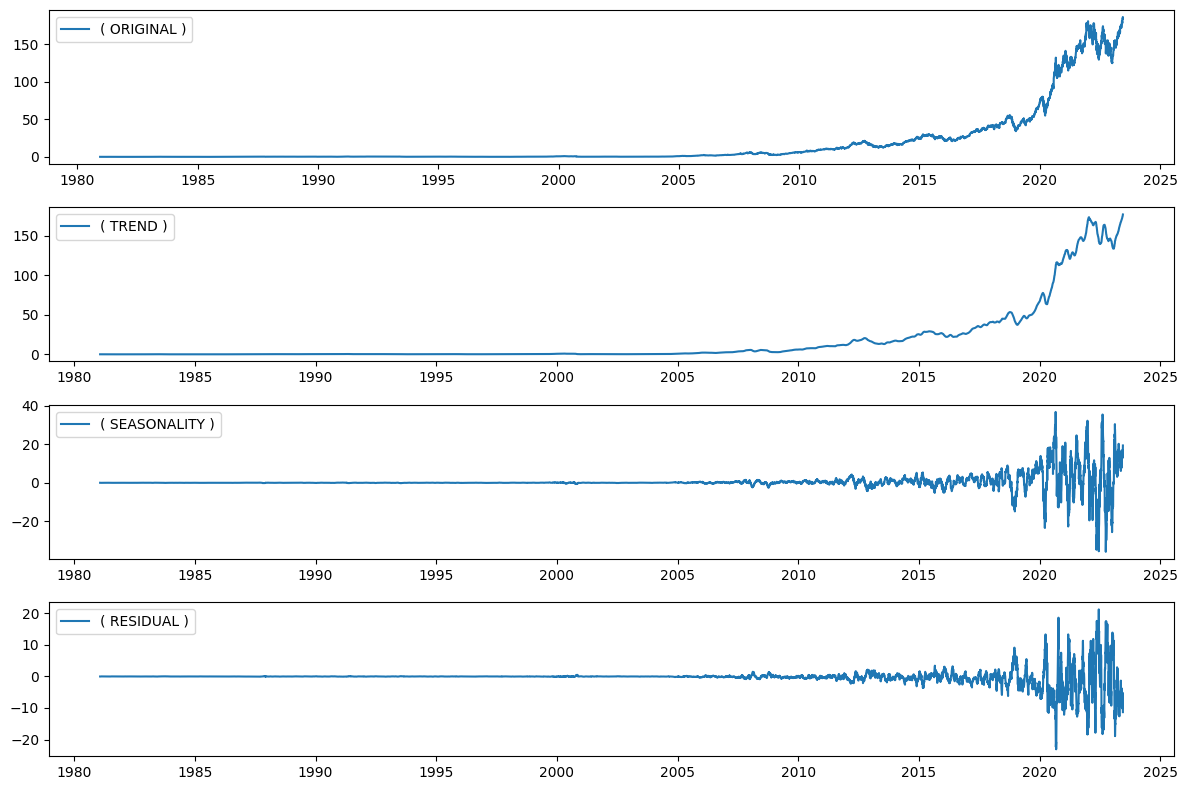

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(dataset['Adj Close'], label='( ORIGINAL )')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='( TREND )')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality, label='( SEASONALITY )')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='( RESIDUAL )')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

##### RESULTS INTERPRETATION :-
(a) Trend:- Represents the long-term upward or downward movement in the data.

(b) Seasonality:- Captures the repeated patterns or cycles in the data.

(c) Residual:- Represents the random and irregular fluctuations not accounted for by the trend and seasonality.

##### 4) Additionally, use the Hodrick-Prescott (HP) filter to decompose the time series into trend and cyclical components.


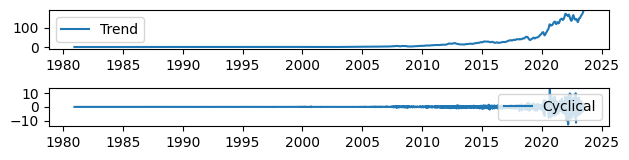

In [8]:
import statsmodels.api as sm

# Perform Hodrick-Prescott (HP) filter
cycle, trend = sm.tsa.filters.hpfilter(dataset['Adj Close'], lamb=1600)

# Plot the trend and cyclical components
plt.subplot(615)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(616)
plt.plot(cycle, label='Cyclical')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## Task 3: Check for Stationarity
##### 1) Perform both the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test on the original time series data.

##### a) The ADF test tests the null hypothesis that a unit root is present in the time series, indicating non-stationarity. 
##### b) The KPSS test tests the null hypothesis that the time series is stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF test
adf_result = adfuller(dataset['Adj Close'])
print(f'ADF Test - p-value: {adf_result[1]}')

# KPSS test
kpss_result = kpss(dataset['Adj Close'])
print(f'KPSS Test - p-value: {kpss_result[1]}')


ADF Test - p-value: 1.0
KPSS Test - p-value: 0.01


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_13704\1608771434.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(dataset['Adj Close'])


##### 2) Repeat the ADF and KPSS tests on the residual obtained from the decomposition and interpret the results.


In [10]:
# ADF test on residual
adf_residual_result = adfuller(residual.dropna())
print(f'ADF Test on Residual - p-value: {adf_residual_result[1]}')

# KPSS test on residual
kpss_residual_result = kpss(residual.dropna())
print(f'KPSS Test on Residual - p-value: {kpss_residual_result[1]}')

ADF Test on Residual - p-value: 1.1475224667472064e-27
KPSS Test on Residual - p-value: 0.01


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_13704\396065953.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_residual_result = kpss(residual.dropna())


##### 3) Interpret the test results to determine if the time series is stationary or not.

##### (a) For the ADF test, if the p-value is below a chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the time series is stationary.

##### (b) For the KPSS test, if the p-value is above the significance level, we reject the null hypothesis of stationarity.
##### By performing these tests on both the original data and the residual, we can assess the stationarity of the series and the effectiveness of the decomposition.

## Task 4: Make the Series Stationary

##### 1) Visualize the original series and the residual series after decomposition.



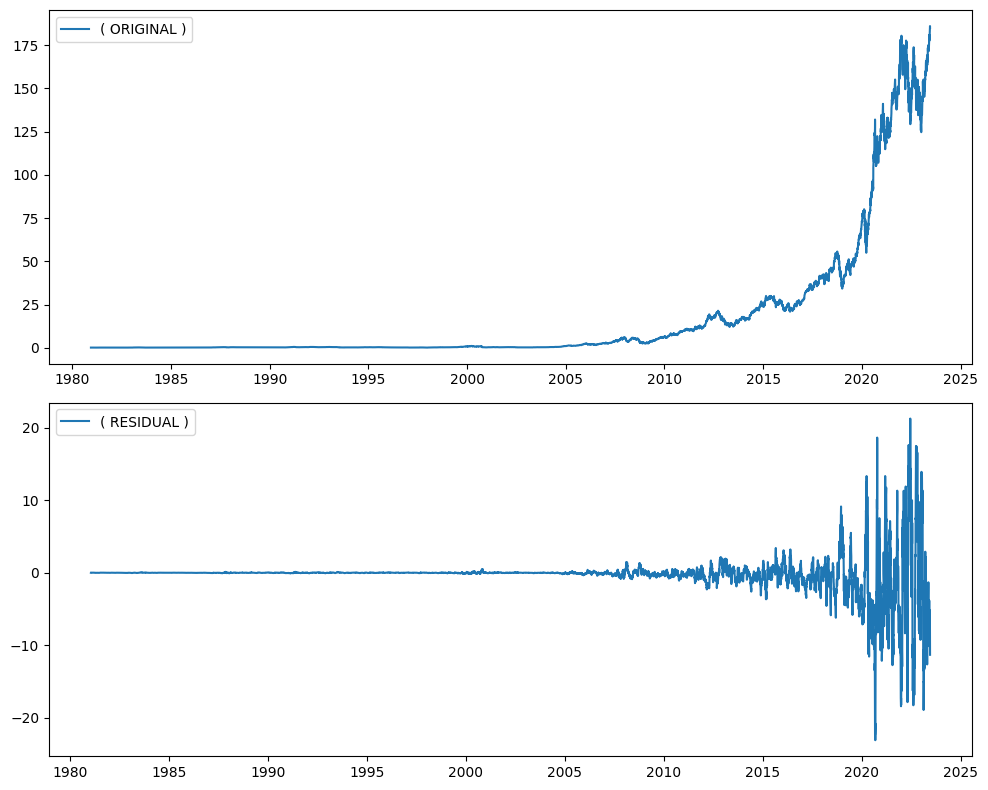

In [11]:
plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(dataset.index, dataset['Adj Close'], label='( ORIGINAL )')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(dataset.index, residual, label='( RESIDUAL )')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


##### 2) Apply different methods to make the residual series and the original series stationary (e.g., differencing, logarithmic transformation).


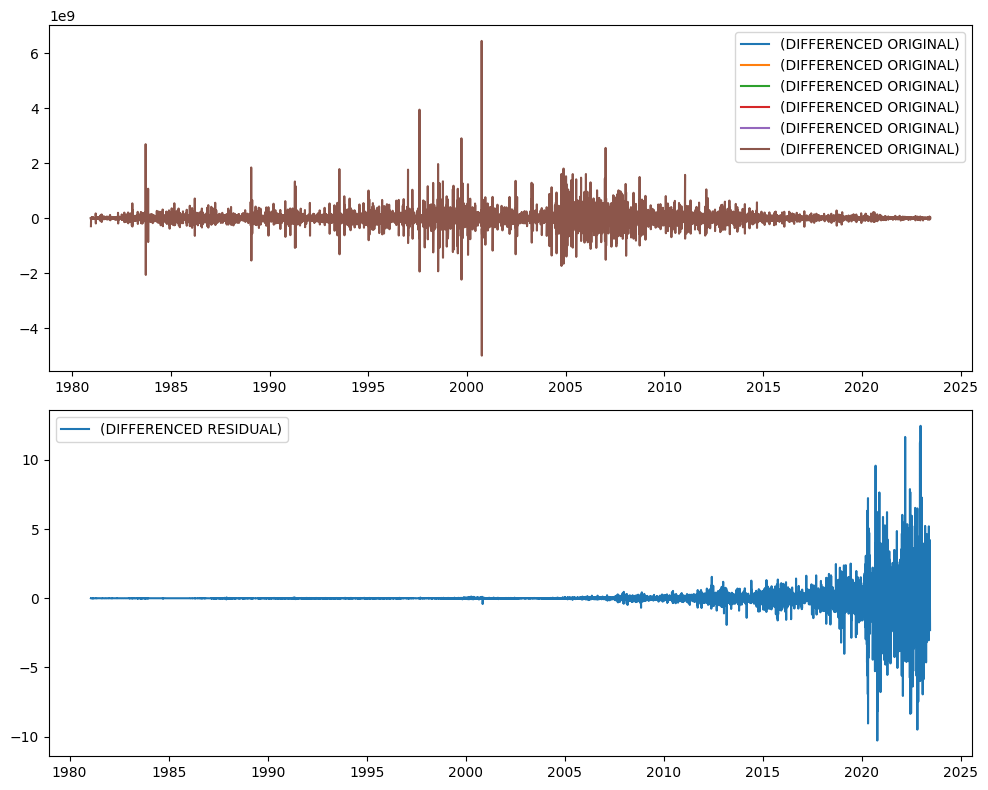

In [12]:
diff_series = dataset.diff().dropna()
diff_residual = residual.diff().dropna()
plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(diff_series.index, diff_series, label='(DIFFERENCED ORIGINAL)')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(diff_residual.index, diff_residual, label='(DIFFERENCED RESIDUAL)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


##### 3) Compare the results visually and choose the best method for further analysis.


##### By comparing the differenced and log-transformed series visually, we can choose the best method that appears to make the series stationary for further analysis.


c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


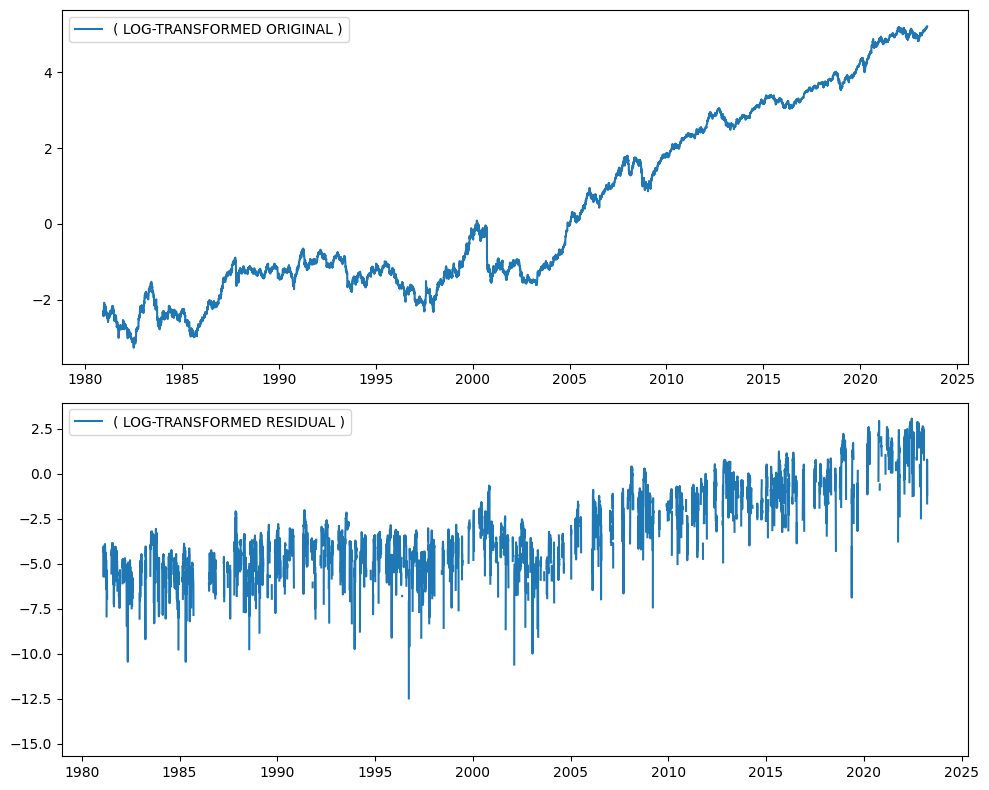

In [13]:
# Logarithmic transformation on original series
log_series = np.log(dataset['Adj Close'])

# Logarithmic transformation on residual series
log_residual = np.log(residual)

plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(dataset.index, log_series, label='( LOG-TRANSFORMED ORIGINAL )')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(dataset.index, log_residual, label='( LOG-TRANSFORMED RESIDUAL )')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## Task 5: Test for Normality

##### 1) Perform the Shapiro-Wilk test to test for normality of the original and transformed series.

In [14]:
from scipy.stats import shapiro

# Shapiro-Wilk test on original series
shapiro_orig = shapiro(dataset['Adj Close'])
print(f'Shapiro-Wilk Test on ORIGINAL - p-value =  {shapiro_orig[1]}')

# Shapiro-Wilk test on transformed series
shapiro_transformed = shapiro(diff_series)  # Replace with the transformed series of your choice
print(f'Shapiro-Wilk Test on TRANSFORMED - p-value =  {shapiro_transformed[1]}')


Shapiro-Wilk Test on ORIGINAL - p-value =  0.0
Shapiro-Wilk Test on TRANSFORMED - p-value =  0.0


c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### 2) Plot QQ-plots to visually inspect the normality assumption.


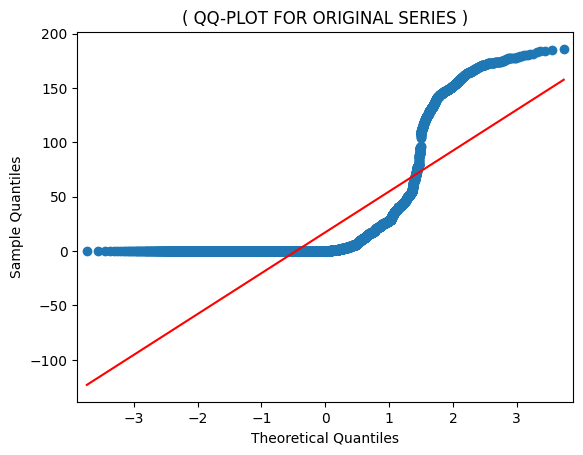

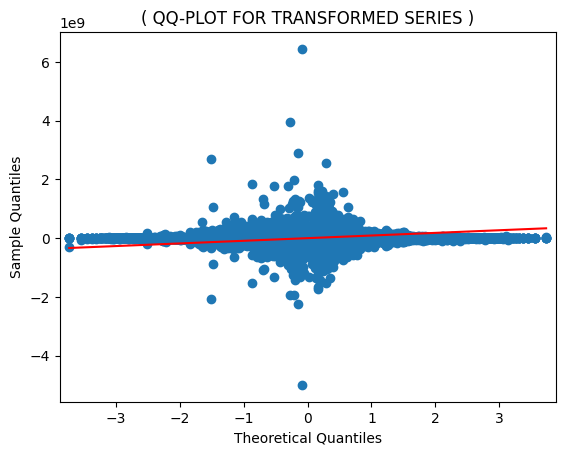

In [15]:
# QQ-plot for original series
sm.qqplot(dataset['Adj Close'], line='s')
plt.title('( QQ-PLOT FOR ORIGINAL SERIES )')
plt.show()

# QQ-plot for transformed series
sm.qqplot(diff_series, line='s')  # Replace with the transformed series of your choice
plt.title('( QQ-PLOT FOR TRANSFORMED SERIES )')
plt.show()


##### 3) Interpret the test results and the QQ-plots to determine if the series can be considered normally distributed.

##### a) Shapiro-Wilk test: If the p-value is above a chosen significance level (e.g., 0.05), we fail to reject the null hypothesis of normality. Lower p-values indicate departure from normality.
##### b) QQ-plots: If the points in the plot closely follow the diagonal reference line, it suggests that the data approximately follows a normal distribution.
##### Based on the test results and QQ-plots, we can determine if the series can be considered normally distributed or not.

## Task 6: Test for Homoscedasticity and Apply Box-Cox Transformation

##### 1)Test for homoscedasticity in the transformed series using appropriate statistical tests (e.g., Breusch-Pagan test).
 

In [16]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

# Generate constant array for exogenous variable
constant = np.ones(len(diff_residual))

# Trim the longer array to match the length of the shorter array
length_diff = len(diff_residual) - len(diff_series)
if length_diff > 0:
    diff_residual = diff_residual[length_diff:]
else:
    diff_series = diff_series[-length_diff:]

# Create exogenous variable with constant and diff_series
exog = np.column_stack((constant, diff_series))

# Perform Breusch-Pagan test on transformed series
bp_test = het_breuschpagan(diff_residual, exog)

print(f'BREUSCH-PAGAN TEST - p-value =  {bp_test[1]}')


BREUSCH-PAGAN TEST - p-value =  9.15855549854787e-14


##### 2) Apply the Box-Cox transformation to the series to normalize the data and stabilize variance.


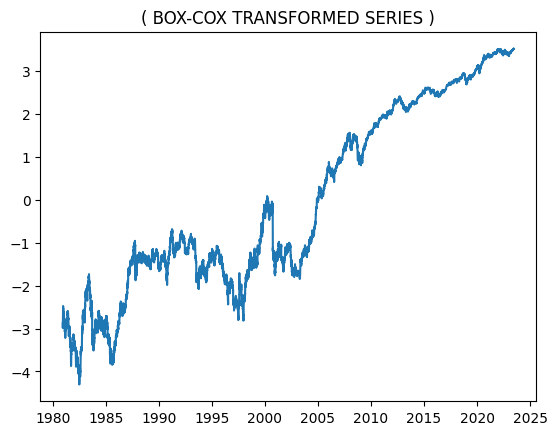

In [17]:
from scipy.stats import boxcox

# Box-Cox transformation on the original series
transformed, lam = boxcox(dataset['Adj Close'])

# Trim the longer array to match the length of the shorter array
length_diff = len(transformed) - len(dataset.index[1:])
if length_diff > 0:
    transformed = transformed[length_diff:]
else:
    dataset = dataset.iloc[-length_diff:]

plt.plot(dataset.index[1:], transformed)
plt.title('( BOX-COX TRANSFORMED SERIES )')
plt.show()


##### 3) Visualize the transformed series and assess the improvement in homoscedasticity.

##### a) By examining the p-value of the BREUSCH-PAGAN test, lower values indicate 'heteroscedasticity', while higher values suggest 'homoscedasticity'.
##### b) The BOX-COX transformation helps normalize the data and stabilize the variance.
##### Assess the improvement in homoscedasticity visually and based on the test result.

## Task 7: Fit a Simple Autoregressive Model

##### 1) Fit a simple autoregressive (AR) model (as demonstrated in the notebook) to the transformed and stationary series.
##### 2) Validate the model by splitting the data into training and testing sets.
##### 3) Evaluate the model's performance using appropriate metrics (e.g., mean squared error, mean absolute error).


In [18]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
train_size = int(len(transformed) * 0.8)
train, test = transformed[:train_size], transformed[train_size:]

# Fit AR model
ar_model = AutoReg(train, lags=1)
ar_model_fit = ar_model.fit()

# Make predictions
predictions = ar_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate model performance
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print(f'MEAN SQUARRED ERROR:-  {mse}')
print(f'MEAN ABSOLUTE ERROR:-  {mae}')


MEAN SQUARRED ERROR:-  0.06979524543003486
MEAN ABSOLUTE ERROR:-  0.2026502249760709


#### By fitting the AR model to the transformed series, we can make predictions and assess its performance using the test set.

## Task 8: Test for Autocorrelation and Plot ACF/PACF

##### 1)Plot the ACF and PACF to visualize the autocorrelation in the transformed series

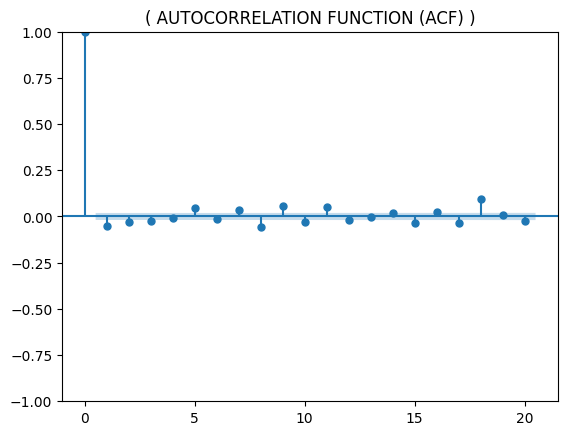

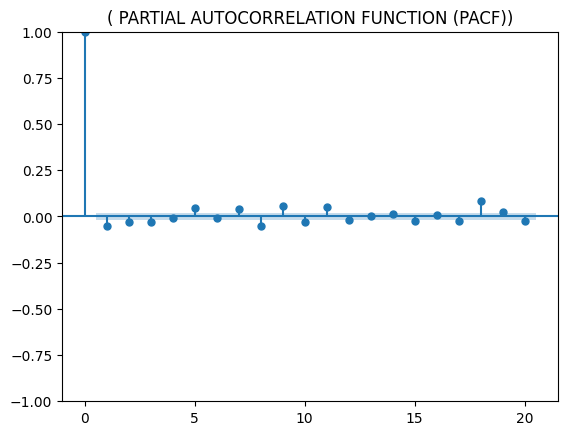

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select a single column from the diff_series DataFrame
diff_column = diff_series['Adj Close']

# Plot ACF and PACF for the selected column
plot_acf(diff_column, lags=20)
plt.title('( AUTOCORRELATION FUNCTION (ACF) )')
plt.show()

plot_pacf(diff_column, lags=20)
plt.title('( PARTIAL AUTOCORRELATION FUNCTION (PACF))')
plt.show()


##### 2) Interpret the ACF and PACF plots to identify the potential autoregressive (AR) and moving average (MA) components.( optional)
##### a) ACF: Significant spikes at certain lags indicate potential MA components.
##### b) PACF: Significant spikes at certain lags indicate potential AR components.
##### By analyzing the ACF and PACF plots, we can determine the appropriate lag orders for the AR and MA components in our autoregressive model.